# Demonstration of the prioritization schemes

In [1]:
#from astropy.coordinates import AltAz, Angle, EarthLocation, get_sun, SkyCoord
from astropy.time import Time
import astropy.units as u
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import cmasher as cmr
#import matplotlib.cm as cm
#from matplotlib import colors
import matplotlib.pyplot as plt
#from matplotlib.ticker import MaxNLocator, MultipleLocator
#import numpy as np
#import os
#from pandas import DataFrame
#from sklearn.neighbors import NearestNeighbors
#import sqlite3

#import constraints as c
#from db import DBConnectorSQLite, SQLiteConnection
#from skyfields import Field, SkyFields
from surveyplanner import SurveyPlanner, Prioritizer
import visualizations as viz

In [2]:
plt.style.use('file:///home/skiehl/Projects/Python/Scripts/mypackages/mplstyles/notebook.mplstyle')

Create required class instances:

In [3]:
surveyplanner = SurveyPlanner('test_planner.sqlite3')
prioritizer = Prioritizer(surveyplanner)
visualizer = viz.FieldVisualizer()

## Show status of observations

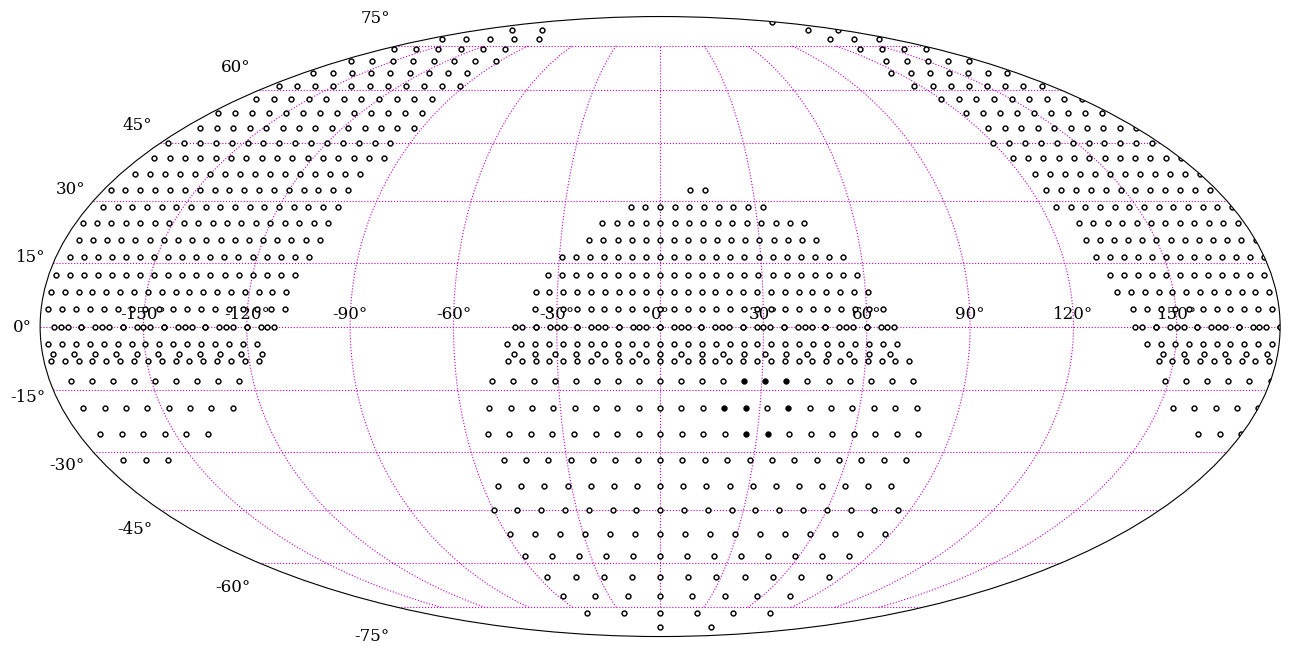

In [4]:
fields_all = surveyplanner.get_fields()
visualizer.show(fields_all=fields_all, show_pending=True, show_finished=True);

## Observable fields

In [5]:
night = Time('2023-07-02')

In [6]:
fields_obs = surveyplanner.get_observable_fields('SAAO', night=night, pending=True, active=True)

In [7]:
visualizer.add_fields(fields_obs=fields_obs)

### Show status of observable fields

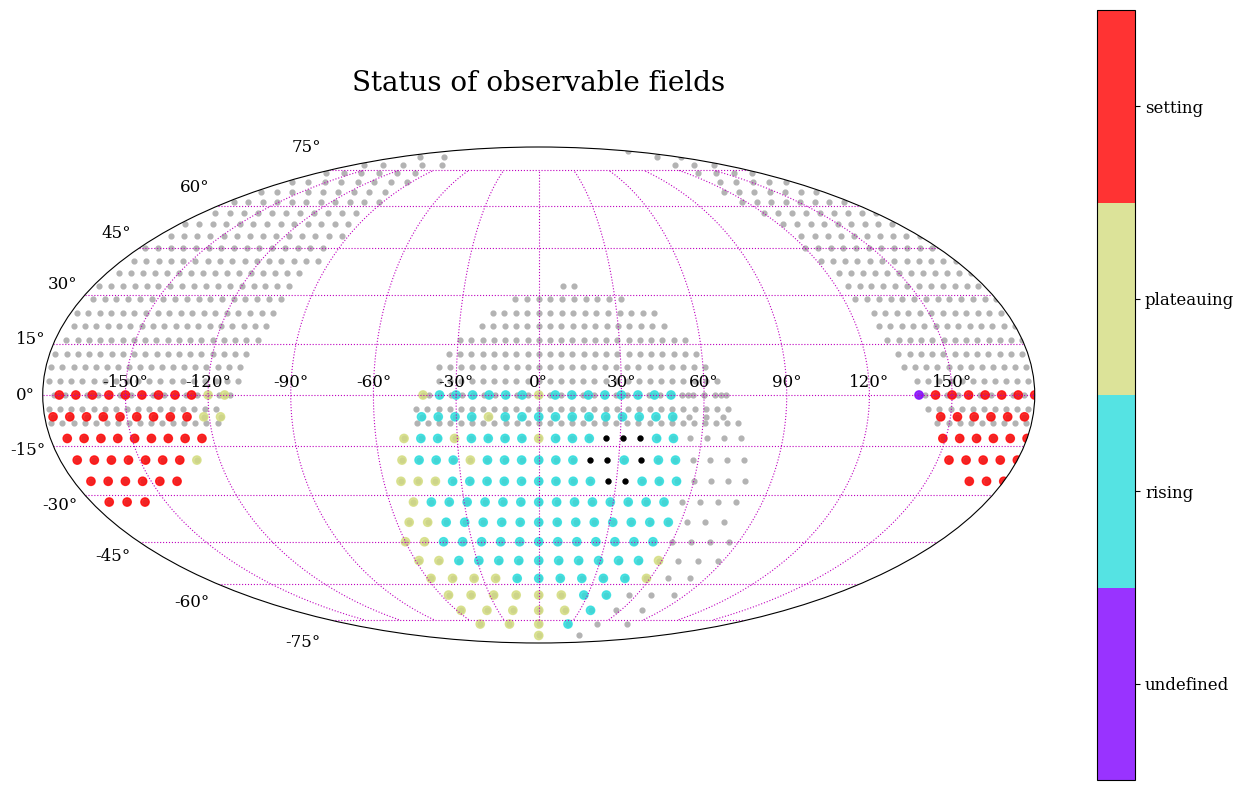

In [8]:
__, ax, __ = visualizer.show(show_pending=False, show_finished=True, show_status=True)
ax.set_title('Status of observable fields', fontsize=20, pad=40);

### Show duration of availability

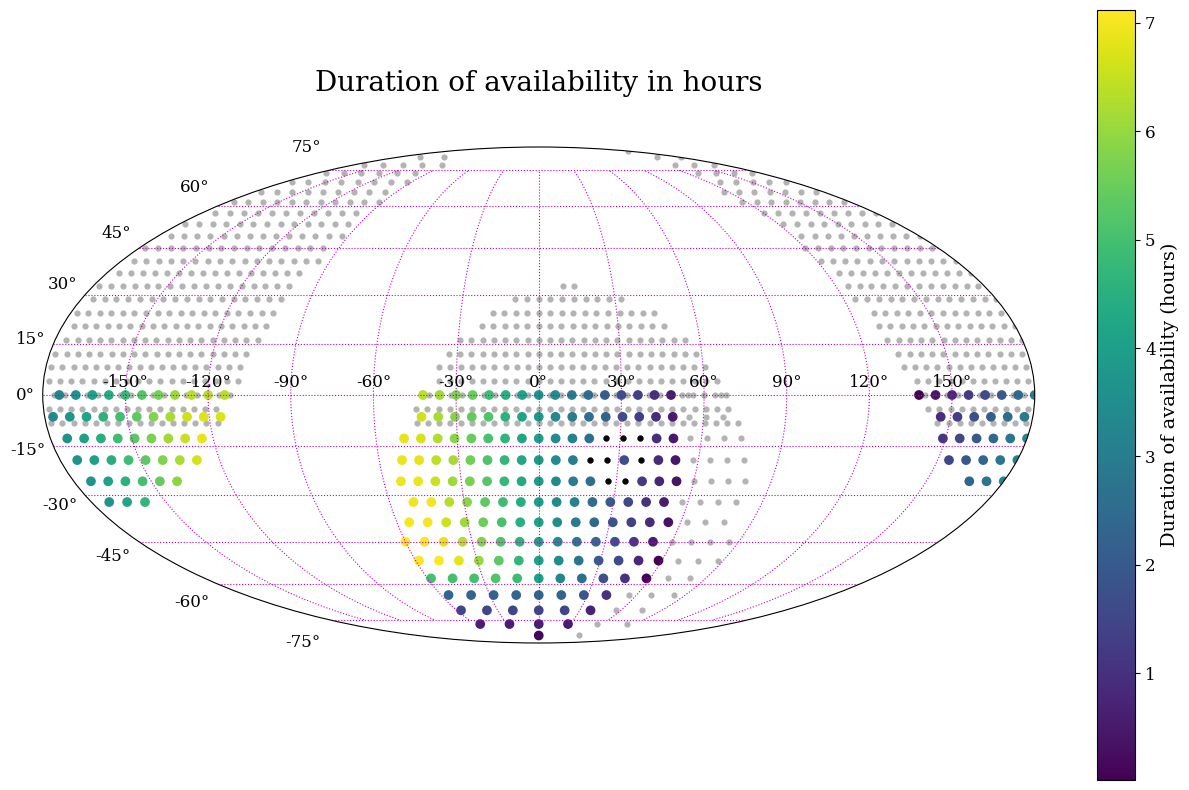

In [9]:
__, ax, __ = visualizer.show(show_pending=False, show_finished=True, show_duration=True)
ax.set_title('Duration of availability in hours', fontsize=20, pad=40);

In [10]:
night_start, night_end = surveyplanner.get_night_start_end('SAAO', night)
night_duration = night_end - night_start

Telescope: SAAO created.


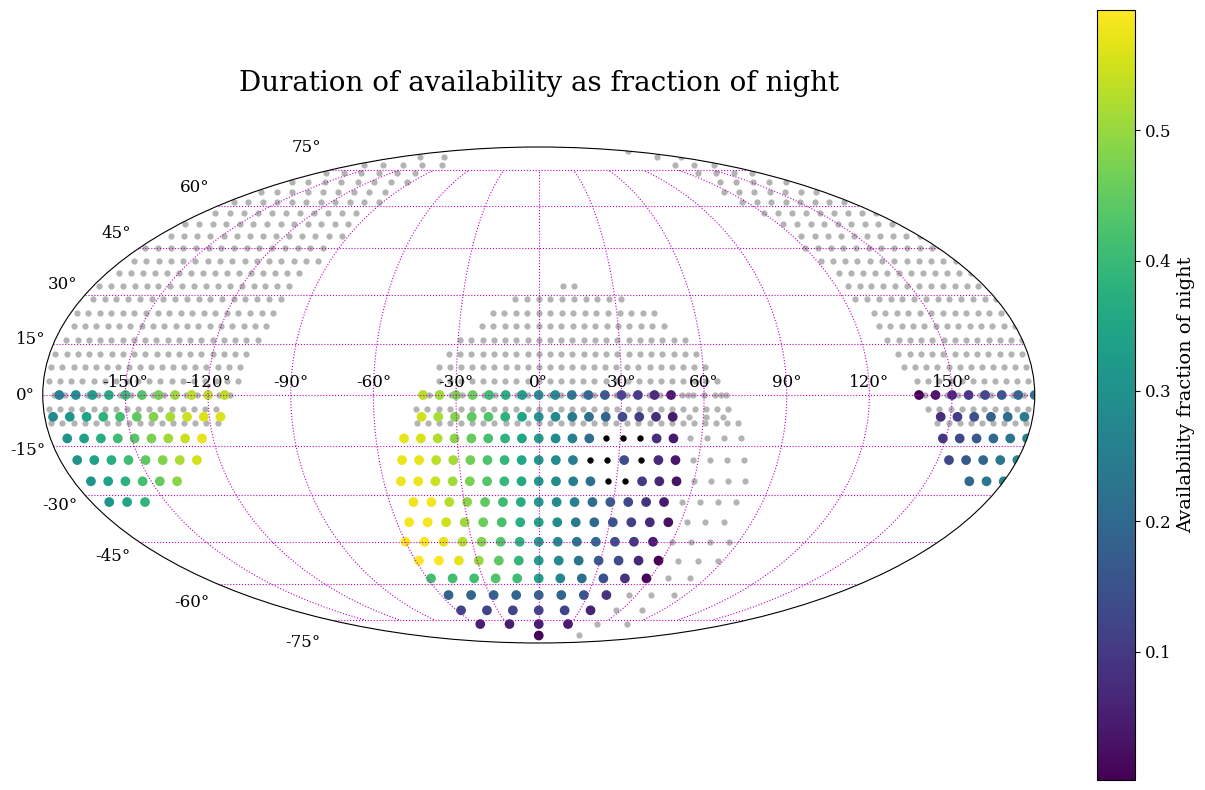

In [11]:
__, ax, __ = visualizer.show(show_pending=False, show_finished=True, show_duration=True, night_duration=night_duration)
ax.set_title('Duration of availability as fraction of night', fontsize=20, pad=40);

### Show duration until fields will set

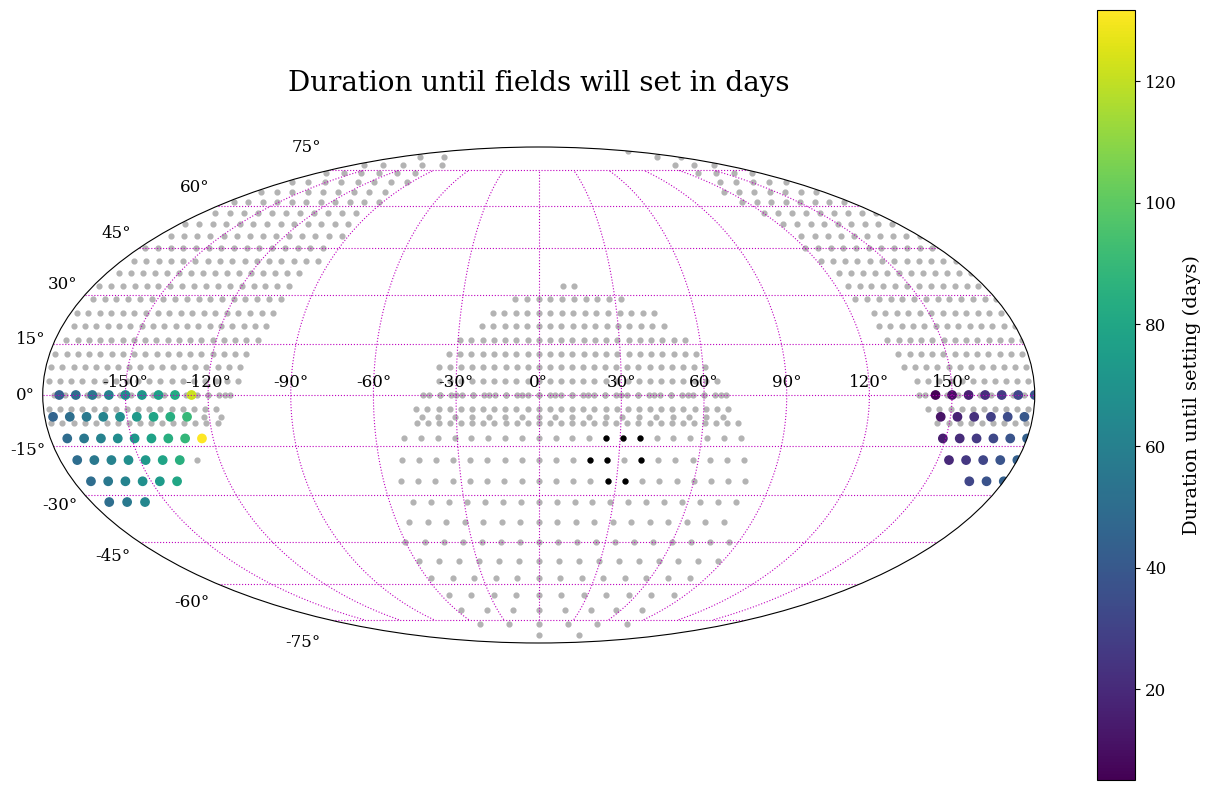

In [12]:
__, ax, __ = visualizer.show(show_pending=False, show_finished=True, show_set_duration=True)
ax.set_title('Duration until fields will set in days', fontsize=20, pad=40);

## Prioritization

### Prioritization by field status

In [13]:
fields_obs, priority = prioritizer.prioritize(
        fields_obs, weight_rising=1., weight_plateauing=1., weight_setting=0., normalize=True, return_priorities=True)

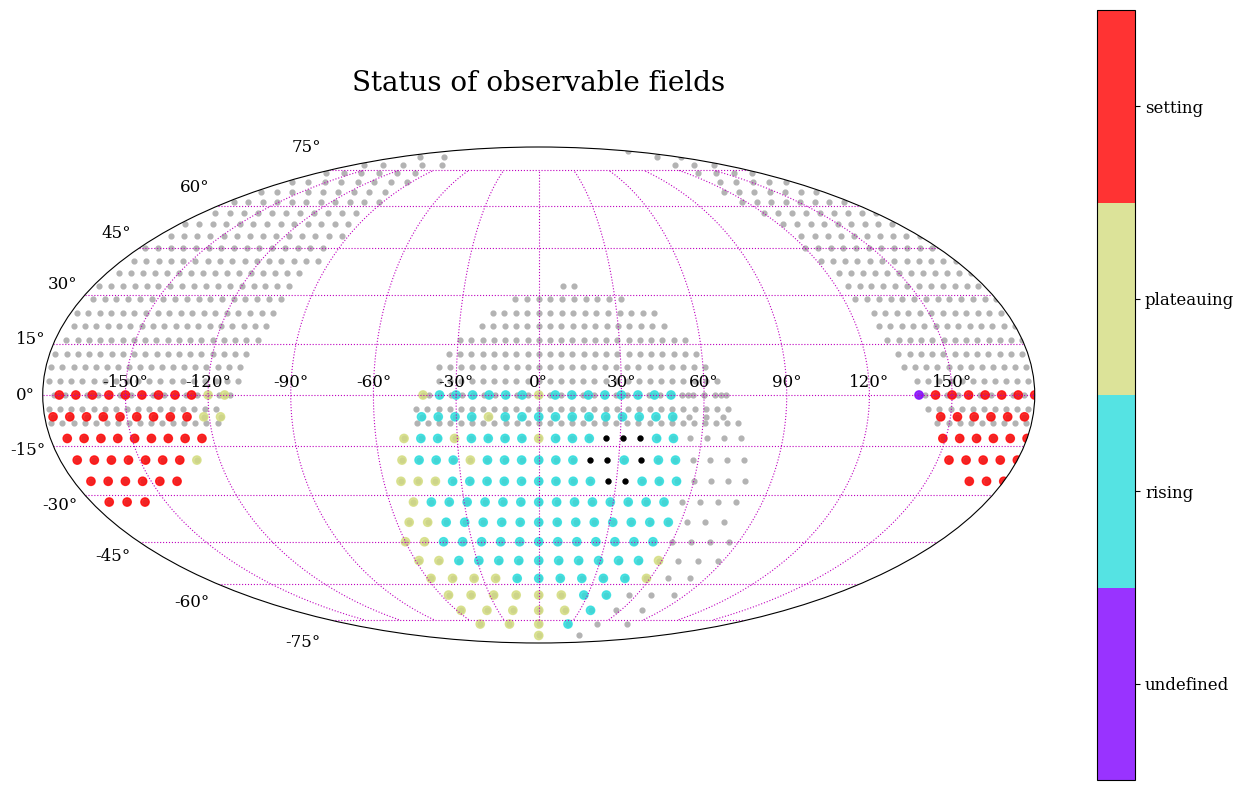

In [14]:
__, ax, __ = visualizer.show(show_pending=False, show_finished=True, show_status=True)
ax.set_title('Status of observable fields', fontsize=20, pad=40);

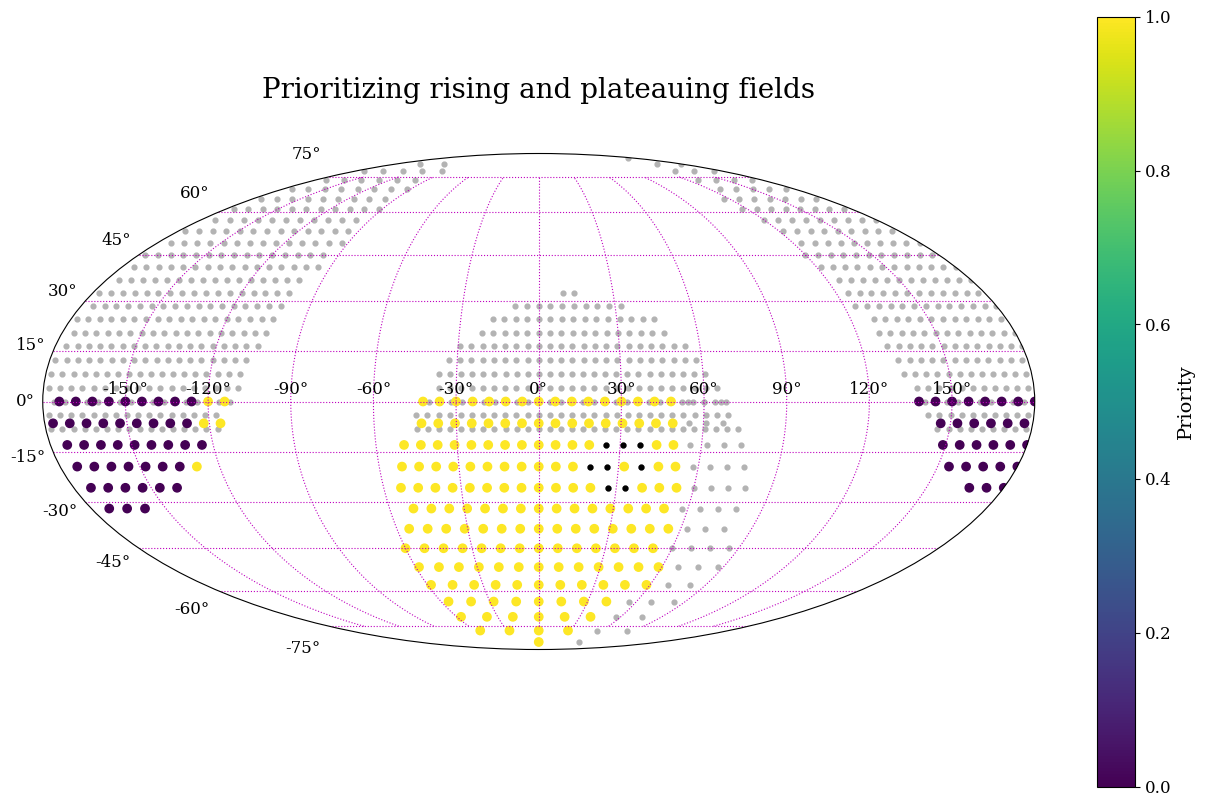

In [15]:
__, ax, __ = visualizer.show(fields_obs=fields_obs, show_pending=False, show_finished=True, show_priority=True)
ax.set_title('Prioritizing rising and plateauing fields', fontsize=20, pad=40);

### Prioritization by sky coverage

In [16]:
radius = 20 * u.deg

fields_obs, priority = prioritizer.prioritize(
        fields_obs, weight_coverage=1., normalize=False, coverage_radius=radius, coverage_observatory='SAAO', coverage_normalize=True,
        return_priorities=True)

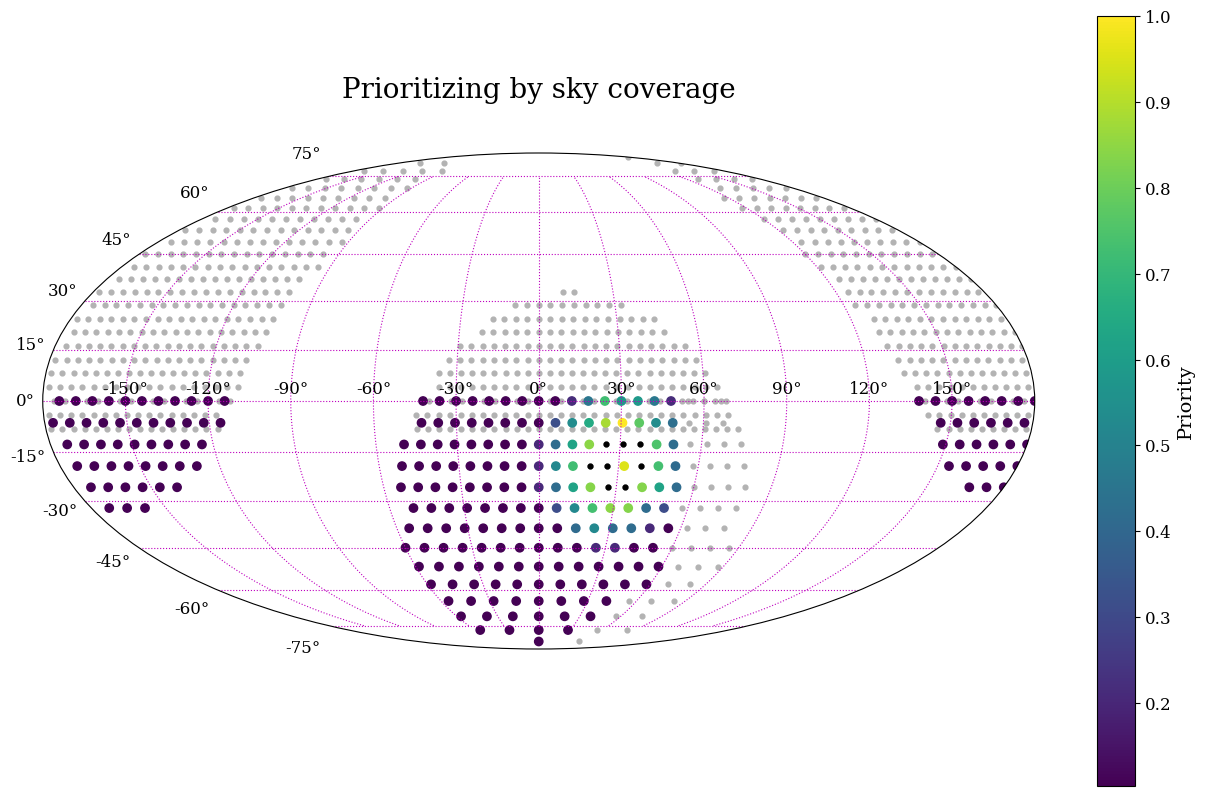

In [17]:
__, ax, __ = visualizer.show(fields_obs=fields_obs, show_pending=False, show_finished=True, show_priority=True)
ax.set_title('Prioritizing by sky coverage', fontsize=20, pad=40);

### Joining prioritization schemes

In the following example we use three prioritization criteria: (1) we prioritize fields by sky coverage and we prioritize (2) plateauing and (3) rising fields. The criteria are then weighted and combined:

In [18]:
weight_coverage = 3.
weight_rising = 1.
weight_plateauing = 1.
radius = 20 * u.deg

fields_obs, priority = prioritizer.prioritize(
        fields_obs, weight_coverage=weight_coverage, weight_rising=weight_rising, weight_plateauing=weight_plateauing, weight_setting=0., normalize=False,
        coverage_radius=radius, coverage_observatory='SAAO', coverage_normalize=True, return_priorities=True)

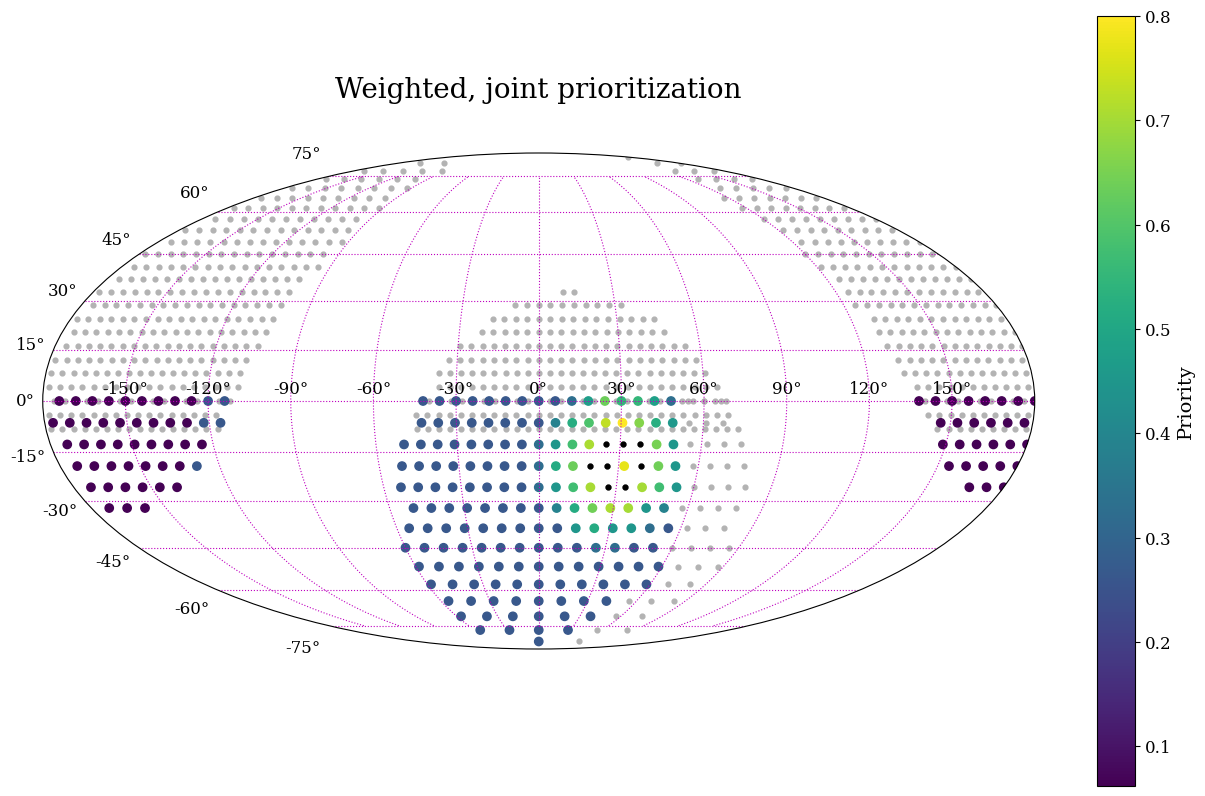

In [19]:
__, ax, __ = visualizer.show(fields_obs=fields_obs, show_pending=False, show_finished=True, show_priority=True)
ax.set_title('Weighted, joint prioritization', fontsize=20, pad=40);

In [20]:
weight_coverage = 1.
weight_rising = 1.
weight_plateauing = 1.
radius = 20 * u.deg

fields_obs, priority = prioritizer.prioritize(
        fields_obs, weight_coverage=weight_coverage, weight_rising=weight_rising, weight_plateauing=weight_plateauing, weight_setting=0., normalize=False,
        coverage_radius=radius, coverage_observatory='SAAO', coverage_normalize=True, return_priorities=True)

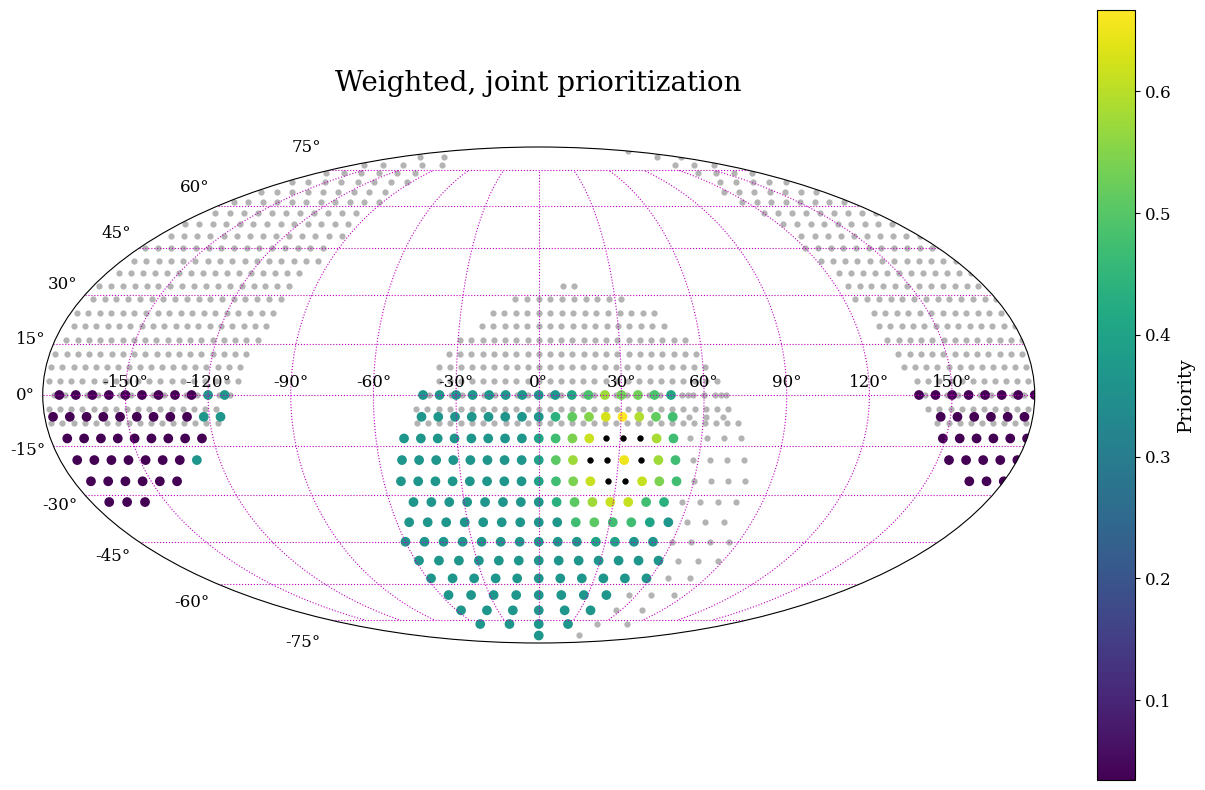

In [21]:
__, ax, __ = visualizer.show(fields_obs=fields_obs, show_pending=False, show_finished=True, show_priority=True)
ax.set_title('Weighted, joint prioritization', fontsize=20, pad=40);